# About Dataset
* **Age:** age of the patient [years]

* **Sex:** sex of the patient [M: Male, F: Female]

* **ChestPainType:** chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

* **RestingBP:** resting blood pressure [mm Hg]

* **Cholesterol:** serum cholesterol [mm/dl]

* **FastingBS:** fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

* **RestingECG:** resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

* **MaxHR:** maximum heart rate achieved [Numeric value between 60 and 202]

* **ExerciseAngina:** exercise-induced angina [Y: Yes, N: No]

* **Oldpeak:** oldpeak = ST [Numeric value measured in depression]

* **ST_Slope:** the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

* **HeartDisease:** output class [1: heart disease, 0: Normal]

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [2]:
df = pd.read_csv(r'C:\Users\Kunwa\OneDrive\Desktop\Data Science\Data Science Course Project\Data\heart.csv')

In [3]:
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
308,58,M,ASY,115,0,1,Normal,138,N,0.5,Up,1
651,61,M,ASY,140,207,0,LVH,138,Y,1.9,Up,1
266,52,M,ASY,130,298,0,Normal,110,Y,1.0,Flat,1
402,65,M,ASY,145,0,1,ST,67,N,0.7,Flat,1
472,53,M,ASY,154,0,1,ST,140,Y,1.5,Flat,1


## Finding Null and Duplicates values in the data

In [4]:
df.isna().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [5]:
df.duplicated().any()

False

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Data Visualization`

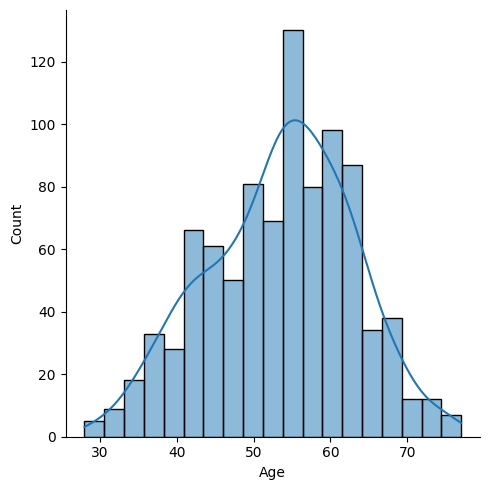

In [7]:
plot = sns.displot(x= df['Age'],kde= True)

<Axes: xlabel='Age'>

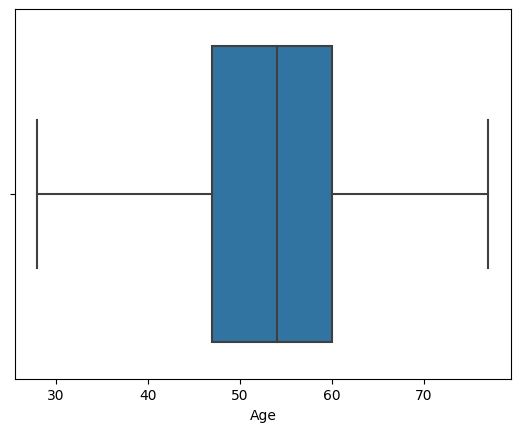

In [8]:
sns.boxplot(x = df['Age'])
# Finding outlier in Age

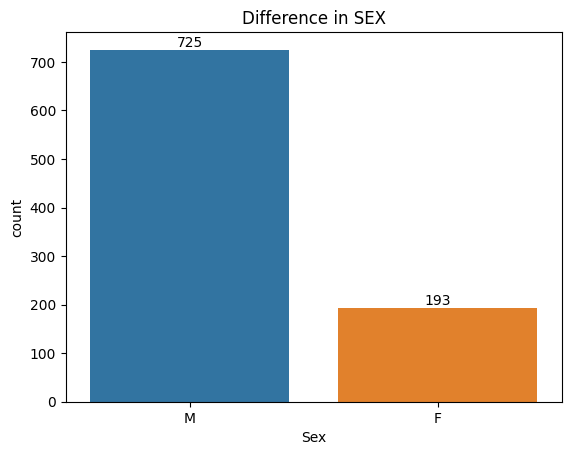

In [9]:
plot = sns.countplot(x=df['Sex'])
for label in plot.containers:
    plot.bar_label(label)
plt.title('Difference in SEX')
plt.show()

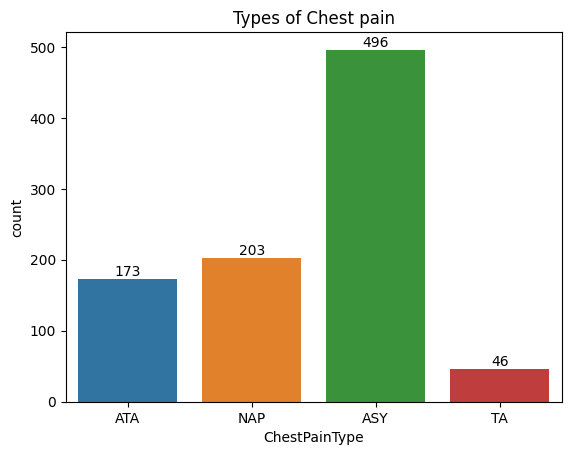

In [10]:
plot = sns.countplot(x=df['ChestPainType'])
for label in plot.containers:
    plot.bar_label(label)
plt.title('Types of Chest pain')
plt.show()

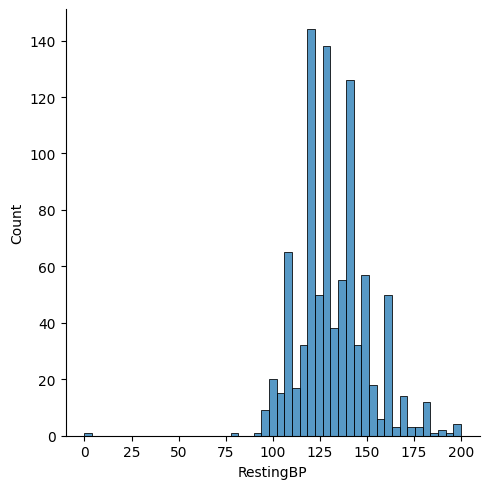

In [11]:
sns.displot(df['RestingBP'])
plt.show()

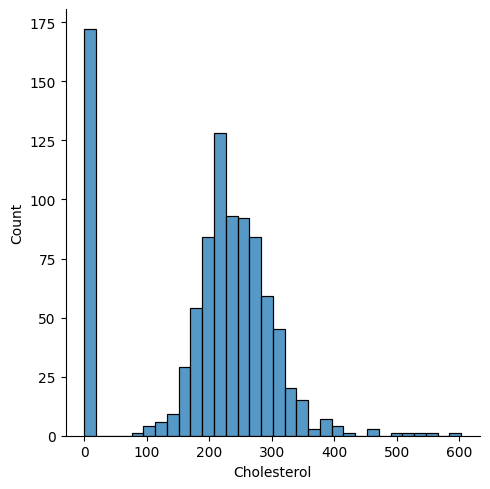

In [13]:
sns.displot(x=df['Cholesterol'])

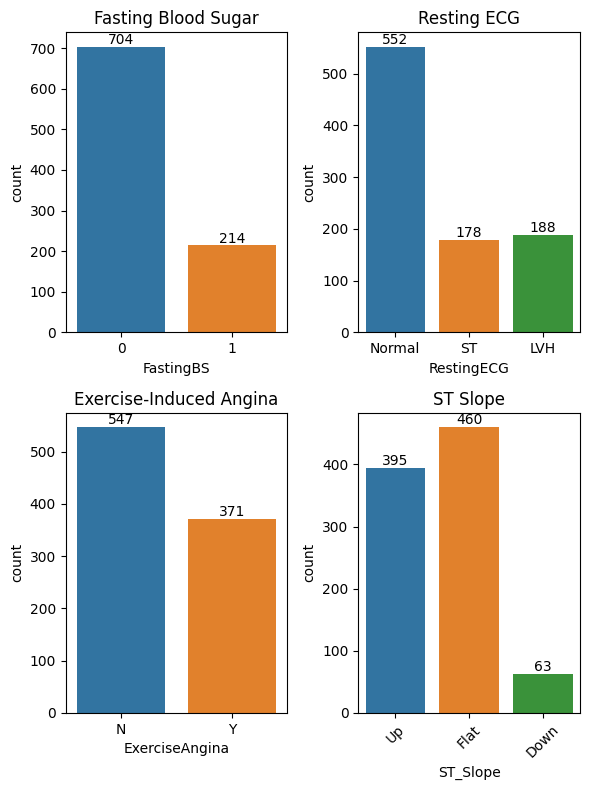

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(6, 8))

# Data for each subplot
subplot_data = ['FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
subplot_titles = ['Fasting Blood Sugar', 'Resting ECG', 'Exercise-Induced Angina', 'ST Slope']

for i, subplot in enumerate(subplot_data):
    ax = sns.countplot(x=df[subplot], ax=axes[i // 2, i % 2])
    for label in ax.patches:
        ax.annotate(format(label.get_height(), '.0f'),
                    (label.get_x() + label.get_width() / 2., label.get_height()),
                    ha='center', va='center', xytext=(0, 5),
                    textcoords='offset points')
    plt.xticks(rotation=45)
    ax.set_title(subplot_titles[i])  # Set title for each subplot

plt.tight_layout()
plt.show()

# Generating individual count plots for elements in list 'l'


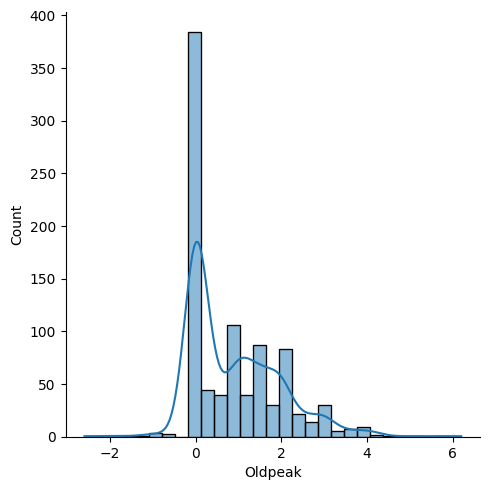

In [18]:
sns.displot(df['Oldpeak'],kde = True)
plt.grid(False)

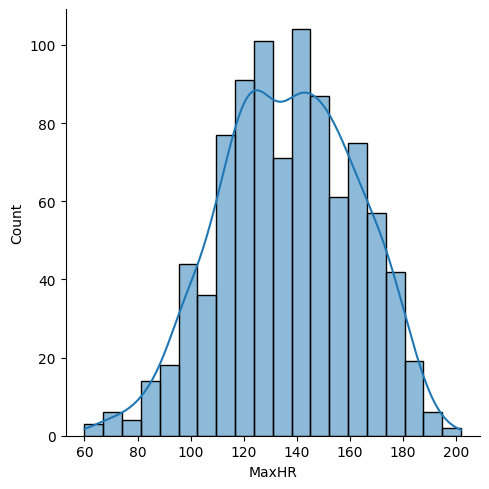

In [19]:
sns.displot(df['MaxHR'],kde = True)
plt.grid(False)

### Distributions are not normal and we can see that HeartDisease , sex and FastingBS columns are imbalance and we may have outliers in dataset fortunately we dont have missing values

### ALERT : we have 0 in RestingBP which is resting blood pressure and a 0 in Cholesterol which is serum cholesterol and they are Fault data

In [22]:
df['RestingBP'].sample(5)

574    142
522    144
743    134
306    115
748    120
Name: RestingBP, dtype: int64

In [24]:
df['Cholesterol'].sample(5)

497    241
448    230
852    177
629    303
340      0
Name: Cholesterol, dtype: int64

### Lets Remove 0 From both Columns

In [27]:
df = df[df['RestingBP']>1]
df = df[df['Cholesterol']>1]

In [30]:
df['RestingBP'].unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122,  98, 105, 133, 126, 139, 134, 152, 141, 137, 146,
       158, 123,  96, 144, 131, 143, 116, 104, 172, 156, 114, 127, 101,
       174,  94, 148, 178, 165, 117, 192, 129, 102, 154, 164], dtype=int64)

In [31]:
df['Cholesterol'].unique()

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163,
       529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85,
       269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156,
       272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279,
       198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320,
       187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219,
       257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309,
       200, 336, 355, 326, 171, 491, 271, 274, 394, 221, 126, 305, 220,
       242, 347, 344, 358, 169, 181, 236, 203, 153, 316, 311, 252, 458,
       384, 258, 349, 142, 197, 113, 261, 310, 232, 110, 123, 17

### Hence There is no more 0 in both RestingBP , Cholesterol

# Encoding categorical values

Usually there are 2 kinds of **categorical data**:

● **Ordinal Data**: The categories have an inherent order like: socio economic status (“low income”,”middle income”,”high income”), education level (“high school”,”BS”,”MS”,”PhD”), income level (“less than 50K”, “50K-100K”, “over 100K”), satisfaction rating (“extremely dislike”, “dislike”, “neutral”, “like”, “extremely like”)
Here are some common encoding methods for ordinal data:

1. Label Encoding

2. Ordinal Encoding

3. Custom Mapping

4. Pandas Categorical Data Type

5. Target Encoding (Mean Encoding)


● **Nominal Data**: The categories do not have an inherent order like: blood type, zip code, gender, race, ethnicity Also binary data would be nominal or ordinal. Generally, In Ordinal data, while encoding, one should retain the information regarding the order in which the category is provided. While encoding Nominal data, we have to consider the presence or absence of a feature. In such a case, no notion of order is present.
There are several encoding methods you can use for nominal data:

1. Label Encoding 

2. One-Hot Encoding (Dummy Encoding)

3. Binary Encoding

4. Hashing Encoding

5. Target Encoding (Mean Encoding)

6. Frequency Encoding


So how should we select encoding methods is depends algorithm(s) we apply :

● Some algorithms can work with categorical data directly or For example, a decision tree can be learned directly from categorical data with no data transform required (this depends on the specific implementation). So Some implementations of machine learning algorithms require all data to be numerical. For example, scikit-learn has this requirement.

● If we categorize algorithms to linear and tree based models we should consider that generally linear models are sensitive to order of ordinal data so we should select appropriate encoding methods.

In [33]:
Nominal_data = ['Sex' ,'RestingECG' ,'ExerciseAngina' ,'ST_Slope']
Ordinal_data = ['ChestPainType']

## I want to use Label Encoding for Nominal data and for Ordinal data

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [44]:
# Label Encoder
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
le = preprocessing.LabelEncoder()

df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['Sex'] = le.fit_transform(df['Sex'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

In [45]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sedf,EdferciseAngina
0,40,1,1,140,289,0,1,172,0,0.0,2,0,1,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1,0,0
2,37,1,1,130,283,0,2,98,0,0.0,2,0,1,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1,0,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0,1,0


In [46]:
df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sedf,EdferciseAngina
Age,1.000000,0.040917,-0.083120,0.259865,0.058758,0.241338,-0.055419,-0.382112,0.245908,0.286006,-0.285421,0.298617,0.040917,0.245908
Sex,0.040917,1.000000,-0.120709,0.034363,-0.107045,0.096075,0.042296,-0.157002,0.192579,0.125743,-0.142808,0.292779,1.000000,0.192579
ChestPainType,-0.083120,-0.120709,1.000000,-0.034066,-0.102644,-0.000226,-0.046851,0.303938,-0.394822,-0.219761,0.238469,-0.395776,-0.120709,-0.394822
RestingBP,0.259865,0.034363,-0.034066,1.000000,0.095939,0.173765,0.035661,-0.125774,0.161035,0.198575,-0.143881,0.173242,0.034363,0.161035
Cholesterol,0.058758,-0.107045,-0.102644,0.095939,1.000000,0.054012,-0.070544,-0.019856,0.086768,0.058488,-0.078516,0.103866,-0.107045,0.086768
FastingBS,0.241338,0.096075,-0.000226,0.173765,0.054012,1.000000,0.031518,-0.102710,0.109995,0.055568,-0.157780,0.160594,0.096075,0.109995
RestingECG,-0.055419,0.042296,-0.046851,0.035661,-0.070544,0.031518,1.000000,-0.158797,0.085602,-0.027555,0.017472,0.009935,0.042296,0.085602
MaxHR,-0.382112,-0.157002,0.303938,-0.125774,-0.019856,-0.102710,-0.158797,1.000000,-0.396289,-0.259533,0.349926,-0.377212,-0.157002,-0.396289
ExerciseAngina,0.245908,0.192579,-0.394822,0.161035,0.086768,0.109995,0.085602,-0.396289,1.000000,0.465491,-0.473543,0.551834,0.192579,1.000000
Oldpeak,0.286006,0.125743,-0.219761,0.198575,0.058488,0.055568,-0.027555,-0.259533,0.465491,1.000000,-0.613961,0.495696,0.125743,0.465491


In [47]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sedf,EdferciseAngina
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,0.756032,0.840483,133.022788,244.635389,0.167560,0.931635,140.226542,0.384718,0.901609,1.410188,0.477212,0.756032,0.384718
std,9.505888,0.429762,0.958198,17.282750,59.153524,0.373726,0.631939,24.524107,0.486855,1.072861,0.598076,0.499816,0.429762,0.486855
min,28.000000,0.000000,0.000000,92.000000,85.000000,0.000000,0.000000,69.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,1.000000,0.000000,120.000000,207.250000,0.000000,1.000000,122.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,237.000000,0.000000,1.000000,140.000000,0.000000,0.500000,1.000000,0.000000,1.000000,0.000000
75%,59.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,160.000000,1.000000,1.500000,2.000000,1.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000,1.000000,1.000000


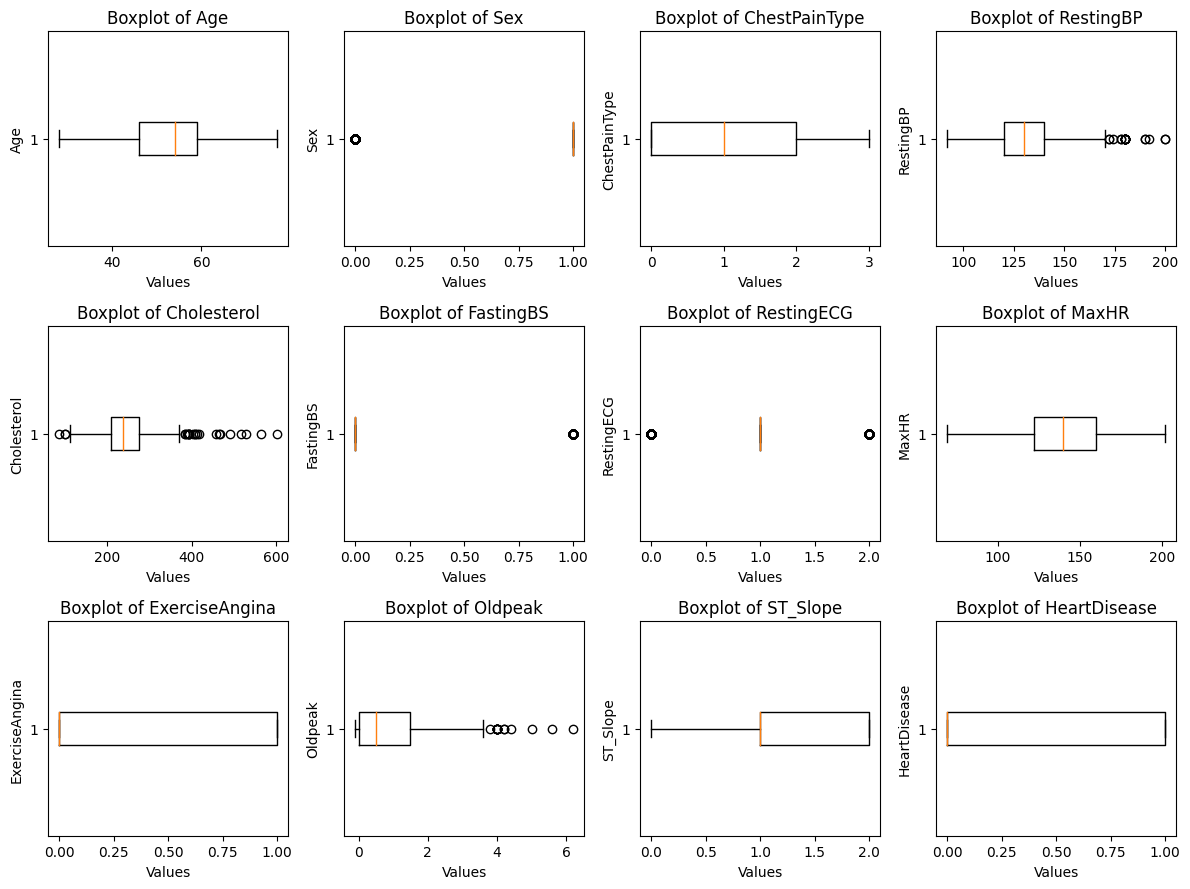

In [48]:
fig, axes = plt.subplots(3, 4, figsize=(12, 9))

# Iterate through each column and plot in the grid
for i, ax in enumerate(axes.ravel()):
    if i < df.shape[1]:  # Ensure we only plot as many columns as we have data for
        column = df.columns[i]
        ax.boxplot(df[column], vert=False)  # Set vert=False for horizontal boxplots
        ax.set_xlabel('Values')
        ax.set_ylabel(column)
        ax.set_title(f'Boxplot of {column}')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# Imbalace Data

In [58]:
x = df.drop(['HeartDisease'],axis=1) 
y= df['HeartDisease']

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1)

In [60]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_prediction = dtc.predict(x_test)
accuracy_score(dtc_prediction, y_test)

0.8093645484949833

In [64]:
svm_class = svm.SVC(kernel = 'rbf')
svm_class.fit(x_train, y_train)
svm_class_predict = svm_class.predict(x_test)
accuracy_score(svm_class_predict, y_test)

0.68561872909699

In [62]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_predict = gnb.predict(x_test)
accuracy_score(gnb_predict, y_test)

0.8327759197324415

In [53]:
df["HeartDisease"].value_counts()

HeartDisease
0    390
1    356
Name: count, dtype: int64

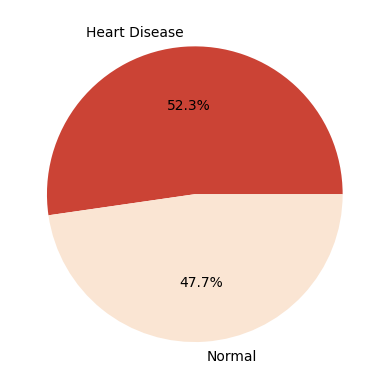

In [56]:
labels = 'Heart Disease' , 'Normal'
sizes = df["HeartDisease"].value_counts()
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels ,autopct='%1.1f%%' ,  colors=['#CB4335', '#FAE5D3'])
plt.show()

In [ ]:
X_test_combine['Decile'] = pd.qcut(X_test_combine['Prob'],10,labels=False)

X_test_combine['Decile'] = X_test_combine['Decile'].max() - X_test_combine['Decile'] + 1
X_test_combine = X_test_combine.sort_values( by = 'Decile', ascending = False)


deciles_stats = X_test_combine.groupby('Decile').agg(
    total_obs =('target','count'),
    total_events = ('target','sum')).reset_index(drop=True)

deciles_stats[ 'cumulative_events']= deciles_stats['total_events'].cumsum(axis = 0)
deciles_stats['percentage_cumulative_events'] = (deciles_stats['cumulative_events'] / deciles_stats[ 'total_events'].sum())* 100